# Contruccion del modelo K-means

Ahora que ya sabemos gracias a los analisis anteriores que K-means es un buen modelo toca que lo contruya

In [1]:
# Importamos las librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Configuracion para mejorar la visualizacion
sns.set_style("whitegrid")
pd.set_option('display.max_columns', None)

# Vista inicial de los datos
df_customer = pd.read_csv("dataset/new_shopping_trends.csv")
df_customer.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


Primeramente vamos a estandarizar las variables numericas y codificar las variables categoricas 

In [3]:
# Identificamos las columnas categóricas y numéricas
categorical_cols = df_customer.select_dtypes(include=['object']).columns
numeric_cols = df_customer.select_dtypes(include=['int64', 'float64']).columns

# Codificamos las variables categóricas con One-Hot Encoding
df_encoded = pd.get_dummies(df_customer, columns=categorical_cols, drop_first=True)

# Estandarizamos los datos para K-Means, ya que se basa en distancias
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

Ahora vamos a usar el metodo del Codo (Elbow Method) para encontrar el número óptimo de clusters probaremos para esto con las cantidades de 1 a 12 clusters

Gráfico del Método del Codo...


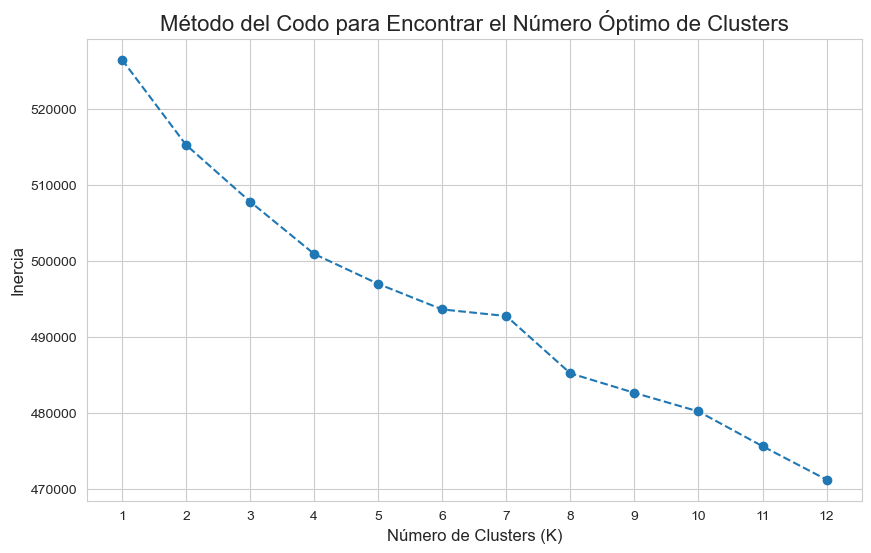

In [4]:
# Una lista para guardar los valores de inercia
inertia = []
# Rango de K a probar
k_range = range(1, 13)

for k in k_range:
    # Inicializamos y entrenamos el modelo K-Means con el número actual de clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    # Guardamos el valor de inercia, que es la suma de las distancias al cuadrado
    inertia.append(kmeans.inertia_)

# d. Visualización de la inercia vs. K
print("Gráfico del Método del Codo...")
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Método del Codo para Encontrar el Número Óptimo de Clusters', fontsize=16)
plt.xlabel('Número de Clusters (K)', fontsize=12)
plt.ylabel('Inercia', fontsize=12)
plt.xticks(k_range)
plt.grid(True)
plt.show()

Como no veo claramente cual seria el numero optimo de clusters ya que pareciera que este numero seria 6 gracias a la visualizacion del grafico del codo sin embargo, esto no es concluyente y ya de entrada esto me genera una contradiccion: 

* Cuando hicimos el Analisis de Componentes Principales PCA y llevamos los datos a 2 dimenciones observamos como se muestra en la imagen

<center><img src = "dataset/2.png" width = 700 height = 550></center>

12 grupos distintos unos mas compactos que otros pero se pueden notar que estos estan a la vista

Por tanto dado que el metodo del Codo no fue concluyente (el numero clusters optimos segun el metodo del codo aparentemente eran 6 sin embargo los datos en 2 dimenciones me arojaban claramente 12 grupos realtivamente bien definidos) he optado por graficar el Coeficiente de Silueta desde 1 a 12 clusters y veamos el resultado

Gráfico del Coeficiente de Silueta...


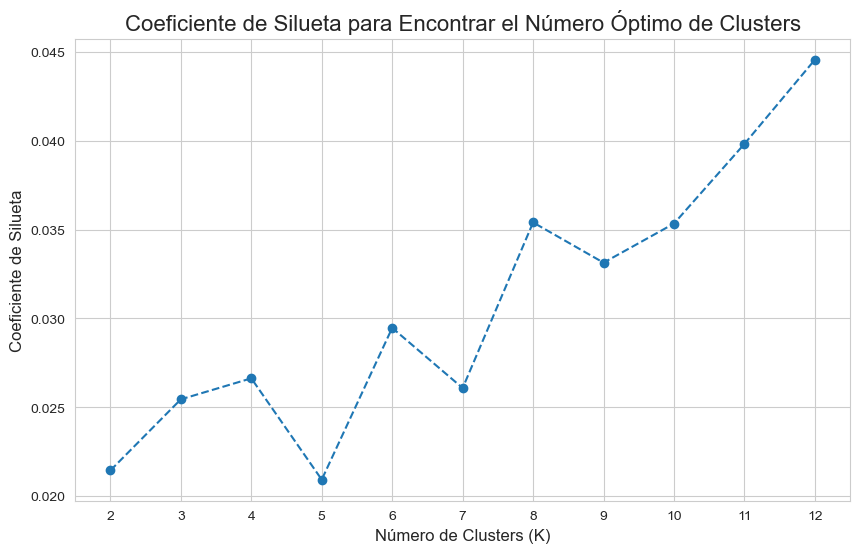

In [5]:
silhouette_scores = []

# print("Calculando el coeficiente de silueta para cada valor de K (de 2 a 12)...")
k_range_silhouette = range(2, 13)
for k in k_range_silhouette:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, clusters)
    silhouette_scores.append(score)
#    print(f"Para K={k}, el Coeficiente de Silueta es: {score:.4f}")

# Visualización del coeficiente de silueta vs. K
print("Gráfico del Coeficiente de Silueta...")
plt.figure(figsize=(10, 6))
plt.plot(k_range_silhouette, silhouette_scores, marker='o', linestyle='--')
plt.title('Coeficiente de Silueta para Encontrar el Número Óptimo de Clusters', fontsize=16)
plt.xlabel('Número de Clusters (K)', fontsize=12)
plt.ylabel('Coeficiente de Silueta', fontsize=12)
plt.xticks(k_range_silhouette)
plt.grid(True)
plt.show()

Ahora gracias al grafico anterior se confirman las sospechas que yo tenia el numero optimo de clusters para el modelo es 12 (esto era algo que ya se veia en el grafico de los datos en 2D) ya que este numero maximiza el valor del Coeficiente de Silueta

Vamos a pasar ahora a contruir el modelo con los 12 clusters

In [6]:
optimal_k = 12

# Inicializamos y entrenamos el modelo K-Means final
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_scaled)

Ahora vamos a crear un nuevo dataset en el que mantendremos las columnas del dataset original y agregaremos a estas el numero del cluster al que pertenece cada fila del mismo

In [7]:
# Creamos una nueva columna 'Cluster' con los resultados
df_customer['Cluster'] = clusters

print("\nContamos el numero de clientes por cluster:")
print(df_customer['Cluster'].value_counts())


Contamos el numero de clientes por cluster:
Cluster
9     1320
2      953
3      310
4      169
5      168
1      159
10     155
11     153
8      146
6      144
0      140
7       83
Name: count, dtype: int64


He decidido hacer rapidamente un conteo de los elementos de cada cluster y con ello me queda claro que pese a que las cantidades son distintas ya que cada cluster representa un segmento distinto de clientes y sera mi tarea en la proxima seccion del proyecto renombrar a cada uno de estos segmentos

In [8]:
# Definir la ruta del archivo de salida
output_path = "dataset/segmented_customers.csv"

# Guardar el DataFrame con la nueva columna de clusters
# Usamos index=False para no guardar la columna de índice de pandas
try:
    df_customer.to_csv(output_path, index=False)
    print(f"DataFrame segmentado guardado exitosamente en '{output_path}'")
except Exception as e:
    print(f"Ocurrió un error al guardar el archivo: {e}")

DataFrame segmentado guardado exitosamente en 'dataset/segmented_customers.csv'


<u>Conclusiones</u>

Hemos hecho un buen modelo de clustering K-means, ahora ya tenemos nuestros clientes etiquetados con dicho cluster (1,2,3...12) pero llega el momento de darles a esos numeros etiquetas reales y en eso consistira la siguiente fase del proyecto en darle al negocio acorde a las caracteristicas de cada grupo un nombre que este pueda interpretar

